In [1]:
# pytorch workflow
# Resources
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import torch
# nn contains the building block for neural networks layers
from torch import nn
import matplotlib.pyplot as plt

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Data preparing and loading
# Excel spreadsheet
# Images
# Videos
# Audio
# Text
# ML is a game of two parts
# Numberical representation
# Finding patters

In [3]:
# Linear Regression 
# y=mx+c m is weigth and c is the bias
# know weight and bias(Parameters)
weigth = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weigth*X + bias

In [4]:
# Spliting data into training and testing
train_split = int(len(X)*0.8)
X_train , Y_train = X[:train_split],y[:train_split]
X_test, Y_test = X[train_split:],y[train_split:]
len(X_train),len(Y_train),len(X_test),len(Y_test)
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

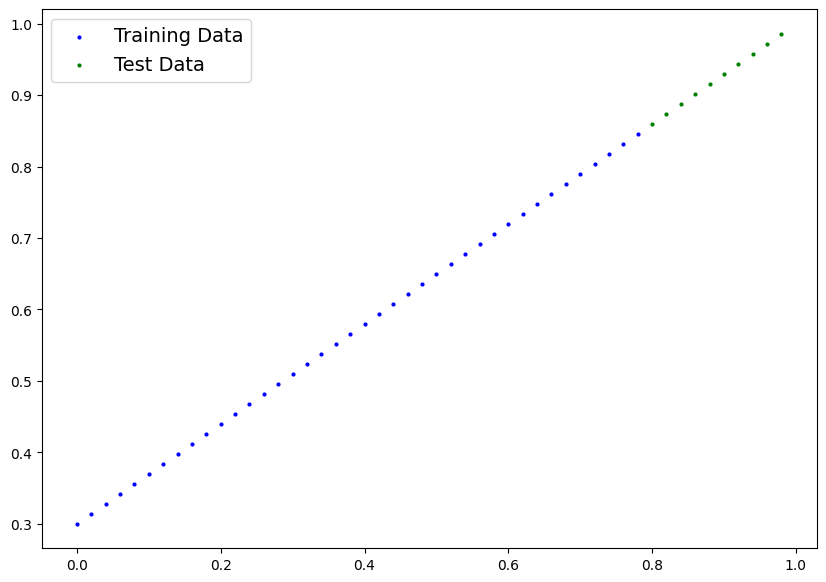

In [5]:
# Visualization
def plot_predictions(train_data=X_train,
                     train_label=Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     prediction = None):
    plt.figure(figsize=(10,7)) 
    plt.scatter(train_data,train_label,c="b",s=4,label="Training Data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Test Data")
    if(prediction!=None):
        plt.scatter(test_data,prediction,c="r",s=4,label="Predictions")
    plt.legend(prop={"size":14});
plot_predictions()

In [6]:
# Build a model(Pytorch model)
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype = torch.float,requires_grad = True))
        self.bias = nn.Parameter(torch.randn(1,dtype = torch.float,requires_grad = True))
#   forward metod to define the computaion in the model
    def forward(self,x: torch.tensor):
        return self.weights * x + self.bias
        

In [7]:
torch.manual_seed(44)
model = LinearRegression()
list(model.parameters())

[Parameter containing:
 tensor([0.0589], requires_grad=True),
 Parameter containing:
 tensor([-1.3945], requires_grad=True)]

In [8]:
# List named parameter
model.state_dict()

OrderedDict([('weights', tensor([0.0589])), ('bias', tensor([-1.3945]))])

In [9]:
weigth ,bias

(0.7, 0.3)

In [10]:
X_test,Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [11]:
# Making predictions using "torch.inference_mode()"
# disables the gradient
with torch.inference_mode():
    y_preds = model.forward(X_test)
y_preds

tensor([[-1.3473],
        [-1.3461],
        [-1.3449],
        [-1.3438],
        [-1.3426],
        [-1.3414],
        [-1.3402],
        [-1.3391],
        [-1.3379],
        [-1.3367]])

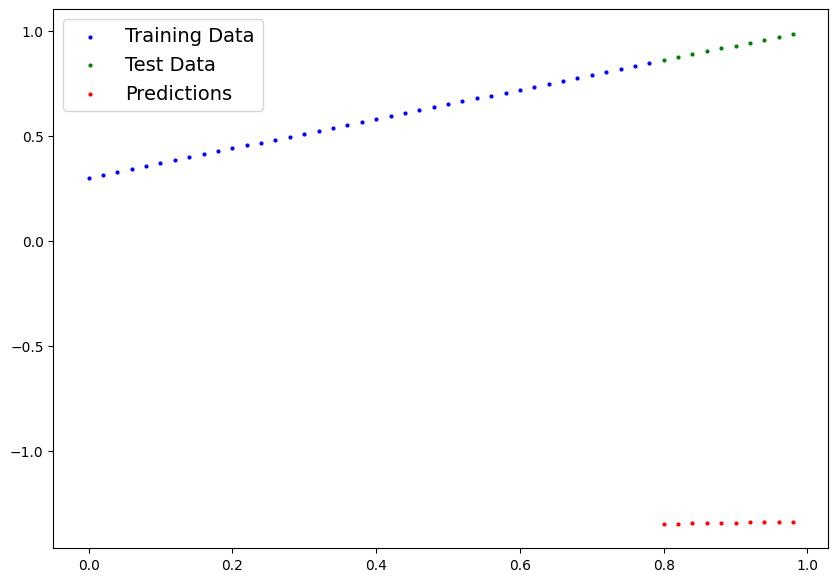

In [12]:
plot_predictions(prediction=y_preds)

In [13]:
# Training Model

# Setup a loss function
loss_fn = nn.L1Loss()

# setup optimizer
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [14]:
# Build a training loop
epochs = 100000
for epoch in range(epochs):
    model.train()
    y_train_preds = model.forward(X_train)
    loss = loss_fn(y_train_preds,Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
model.state_dict()

OrderedDict([('weights', tensor([0.7084])), ('bias', tensor([0.2930]))])

In [15]:
loss

tensor(0.0078, grad_fn=<MeanBackward0>)

In [16]:
with torch.inference_mode():
    y_preds_after_lr = model.forward(X_test)
y_preds_after_lr


tensor([[0.8597],
        [0.8739],
        [0.8881],
        [0.9022],
        [0.9164],
        [0.9306],
        [0.9447],
        [0.9589],
        [0.9731],
        [0.9872]])

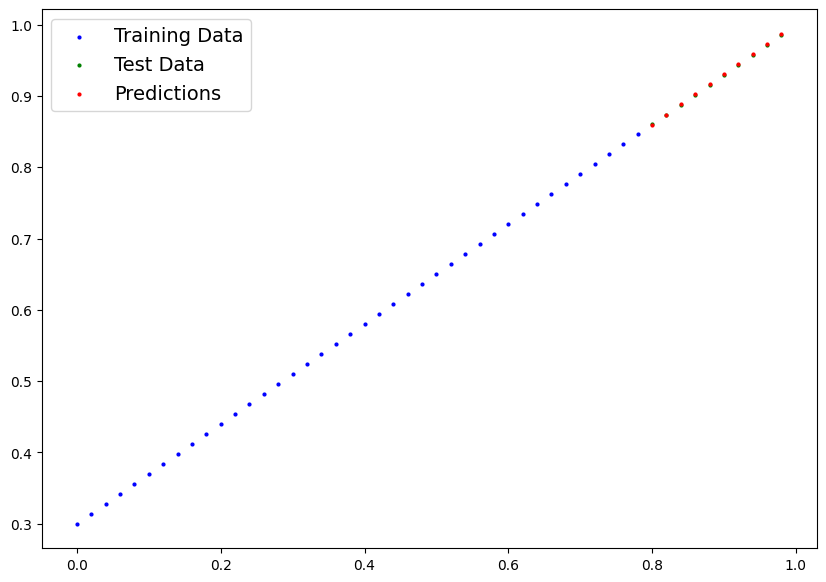

In [17]:
plot_predictions(prediction=y_preds_after_lr)

Saving a model in Pytorch
-> Three amin steps for saving
1.torch.save() - in python pickel format(Serializable,Deserializable)
2.torch.load() - load a saved pytorch object
3.torch.mm.Module.load_state_dict() - model can be saved in the state Dictionary


In [19]:
from pathlib import Path
# 1. Create director
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Model Name
MODEL_NAME = "Pytorch Linear Regression 01.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
print(MODEL_SAVE_PATH)

# 3. Save the Model State Dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj= model.state_dict(),f = MODEL_SAVE_PATH)

models\Pytorch Linear Regression 01.pth
Saving model to : models\Pytorch Linear Regression 01.pth


In [31]:
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load("models/Pytorch Linear Regression 01.pth"))
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.7084])), ('bias', tensor([0.2930]))])

In [33]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
print(f"Loaded Model Preds : {loaded_model_preds} Actual Model Preds : {y_preds_after_lr}")


Loaded Model Preds : tensor([[0.8597],
        [0.8739],
        [0.8881],
        [0.9022],
        [0.9164],
        [0.9306],
        [0.9447],
        [0.9589],
        [0.9731],
        [0.9872]]) Actual Model Preds : tensor([[0.8597],
        [0.8739],
        [0.8881],
        [0.9022],
        [0.9164],
        [0.9306],
        [0.9447],
        [0.9589],
        [0.9731],
        [0.9872]])
